In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Read Data

In [2]:
df = pd.read_csv("dataset/20160930_203718.csv")

In [3]:
df.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),Flow rate (mL/min),Heater voltage (V),R1 (MOhm),R2 (MOhm),R3 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,233.2737,0.8993,0.2231,0.6365,1.1493,0.8483,1.2534,1.4449,1.9906,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,241.6323,0.2112,2.1314,5.3552,9.7569,6.3188,9.4472,10.5769,13.6317,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,241.3888,0.2070,10.5318,22.5612,37.2635,17.7848,33.0704,36.3160,42.5746,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,241.1461,0.2042,29.5749,49.5111,65.6318,26.1447,58.3847,67.5130,68.0064,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,240.9121,0.2030,49.5111,67.0368,77.8317,27.9625,71.7732,79.9474,79.8631,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


# Explore

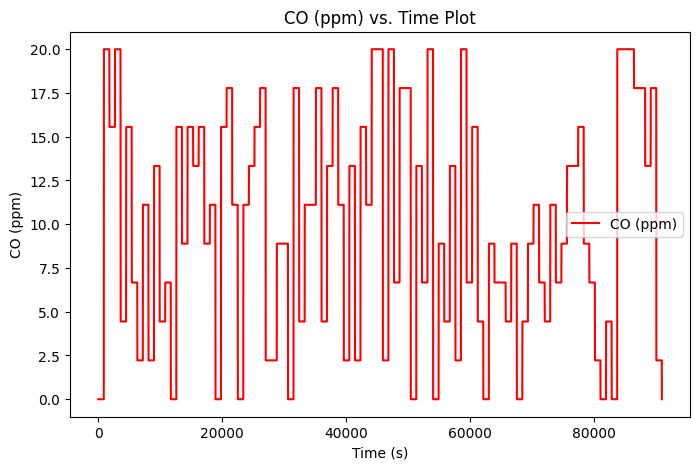

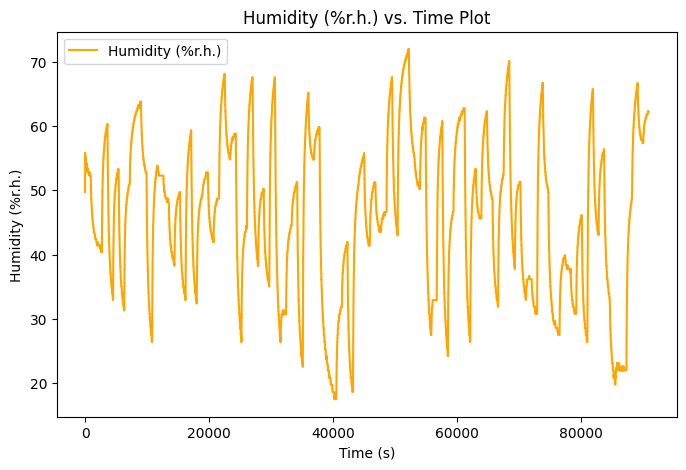

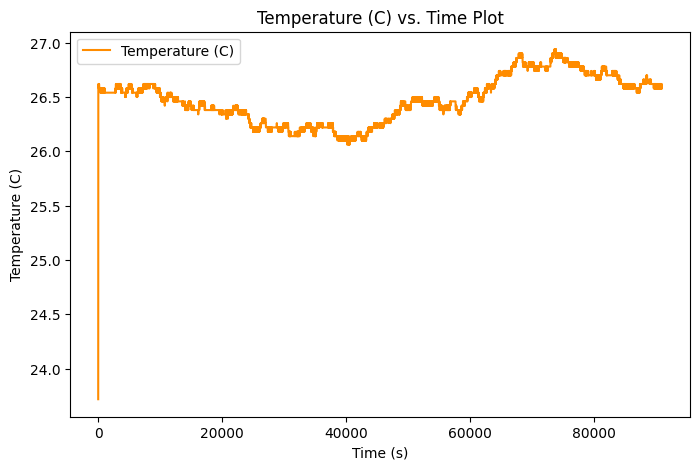

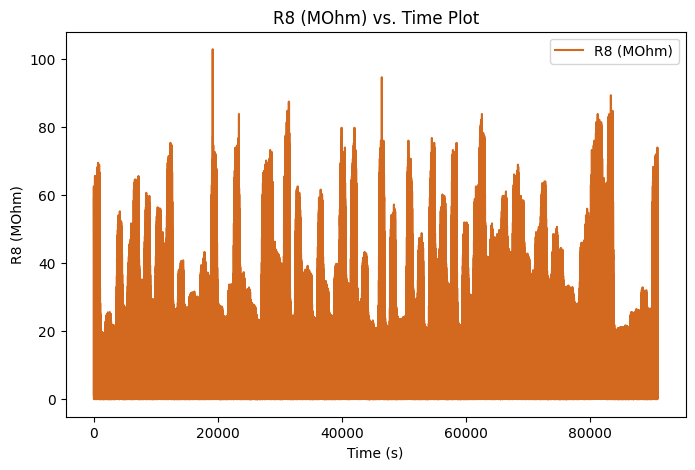

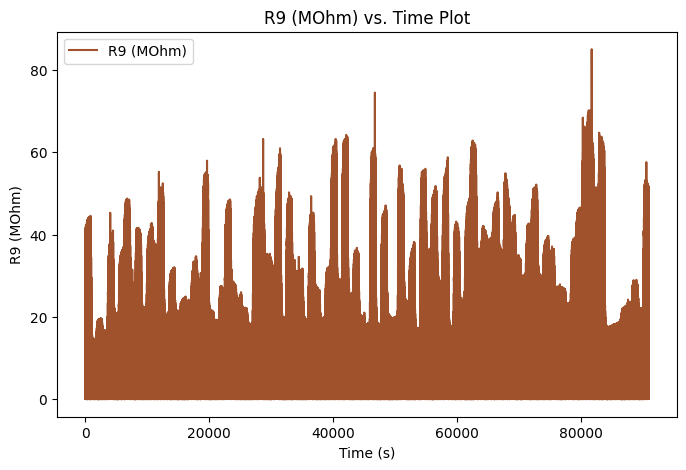

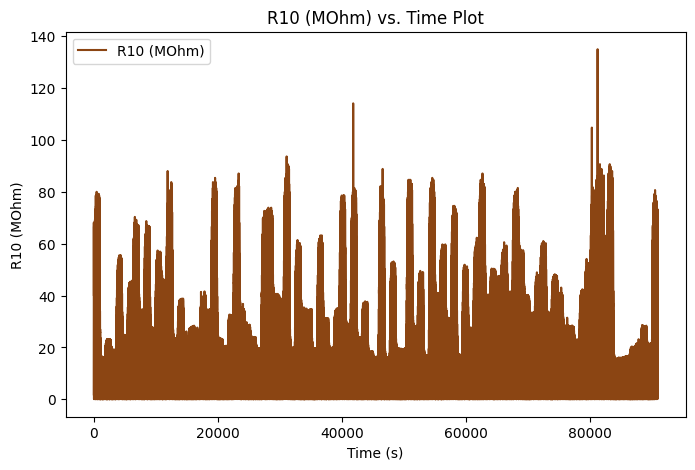

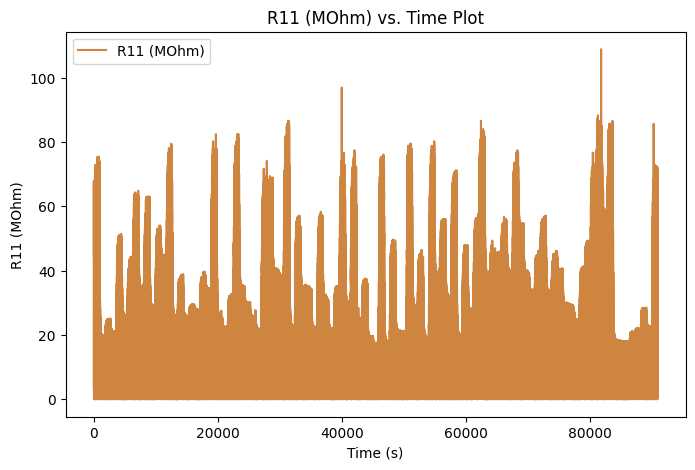

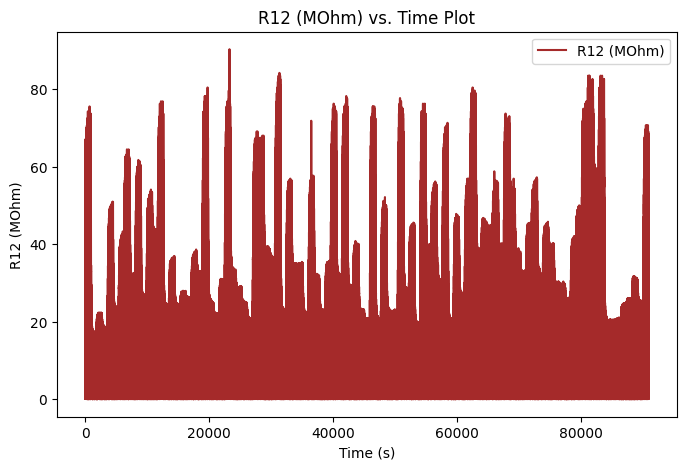

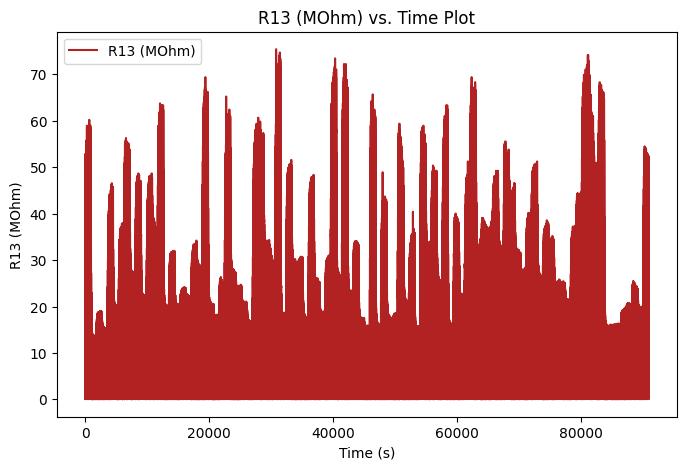

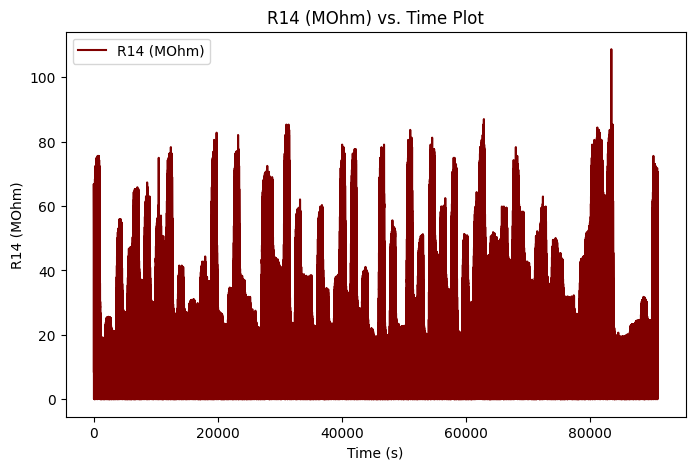

In [4]:
# Specify the columns you want to plot (excluding 'Time (s)')
columns_to_plot = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)', 'R8 (MOhm)',
                   'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)',
                   'R14 (MOhm)']

# Define a list of warm colors
warm_colors = ['red', 'orange', 'darkorange', 'chocolate', 'sienna',
               'saddlebrown', 'peru', 'brown', 'firebrick', 'maroon']

# Plot each column with a warm color
for i, column in enumerate(columns_to_plot):
    plt.figure(figsize=(8, 5))
    plt.plot(df['Time (s)'], df[column], label=column, color=warm_colors[i])
    plt.xlabel('Time (s)')
    plt.ylabel(column)
    plt.title(f'{column} vs. Time Plot')
    plt.legend()
    plt.show()


# CDF Temperature

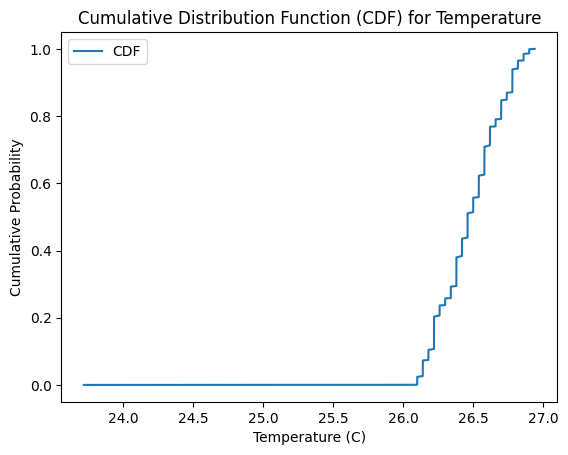

In [5]:
# Extract the 'Temperature (C)' column from the DataFrame
temperature_data = df['Temperature (C)']

# Sort the data in ascending order
sorted_temperature = np.sort(temperature_data)

# Calculate the CDF
cdf_temperature = np.arange(1, len(sorted_temperature) + 1) / len(sorted_temperature)

# Plot the CDF for 'Temperature (C)'
plt.plot(sorted_temperature, cdf_temperature, label='CDF')

# Add labels and title
plt.xlabel('Temperature (C)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) for Temperature')

# Show legend
plt.legend()

# Display the plot
plt.show()

# Correlation

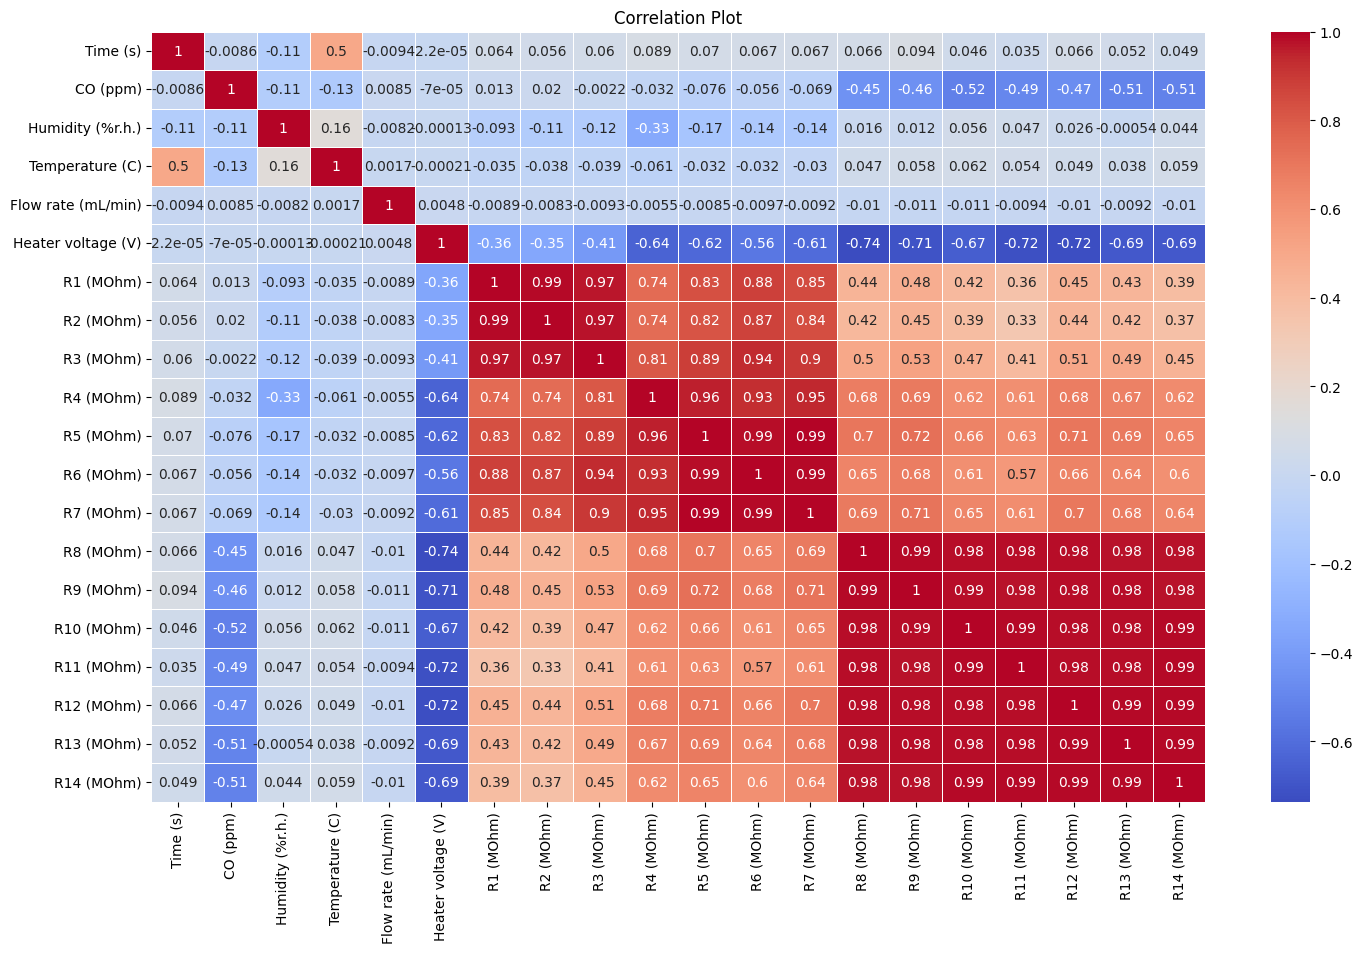

In [6]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(17, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Plot')
plt.show()

# Correlation for CO

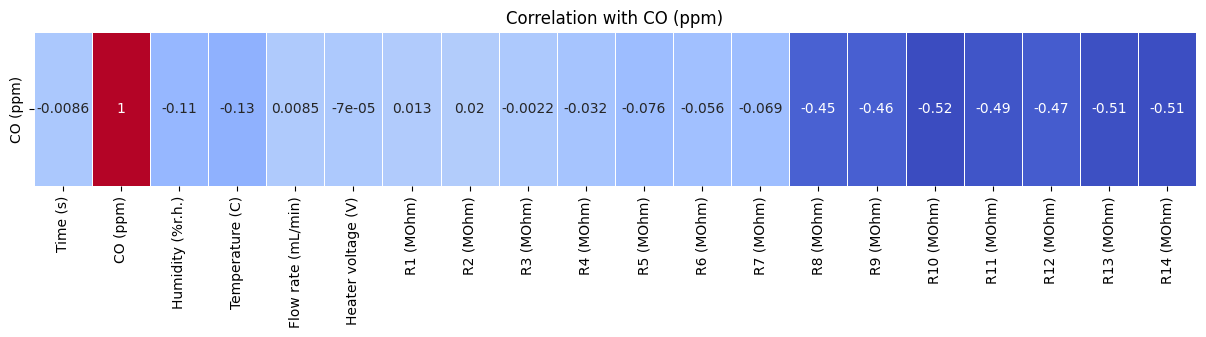

In [7]:
specific_column = 'CO (ppm)'  

# Calculate correlation matrix for the specific column
column_correlation = df.corrwith(df[specific_column])

# Create a heatmap using Seaborn for visualization
plt.figure(figsize=(15, 2))
sns.heatmap(pd.DataFrame(column_correlation, columns=[specific_column]).T,
            annot=True, cmap='coolwarm', linewidths=.5, cbar=False)
plt.title(f'Correlation with {specific_column}')
plt.show()

# Remove columns with low correlation

In [8]:
absolute_correlation_threshold = 0.1  # Adjust as needed

# Calculate correlation with the specific column
column_correlation = df.corr().abs()[specific_column]

# Find columns with correlation below the absolute threshold
low_correlation_cols = column_correlation[column_correlation < absolute_correlation_threshold].index

if 'Time (s)' in low_correlation_cols:
    low_correlation_cols = low_correlation_cols.drop('Time (s)')

# Drop columns with low correlation
df_filtered = df.drop(low_correlation_cols, axis=1)

# Display the filtered DataFrame
print(df_filtered.columns)

Index(['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)'],
      dtype='object')


In [9]:
df_filtered.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,23.7184,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.6200,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.6200,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.6200,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.6200,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


# Outliers

In [10]:
# Specify the columns for which you want to find outliers
columns_to_check = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
                    'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
                    'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']

# Set a z-score threshold for identifying outliers
z_score_threshold = 4  # Adjust as needed

# Create a DataFrame to store outliers and their z-scores
outliers_df = pd.DataFrame(columns=['Column', 'Outliers', 'Z-Scores'])

# Iterate through each column
for column_to_check in columns_to_check:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(df_filtered[column_to_check])

    # Find indices of outliers
    outlier_indices = abs(z_scores) > z_score_threshold

    # Get the actual values and z-scores of outliers
    outliers = df_filtered.loc[outlier_indices, column_to_check]
    outlier_z_scores = z_scores[outlier_indices]

    # Add data to the outliers_df DataFrame
    column_outliers_df = pd.DataFrame({
        'Column': [column_to_check] * len(outliers),
        'Outliers': outliers.values,
        'Z-Scores': outlier_z_scores
    })
    outliers_df = pd.concat([outliers_df, column_outliers_df], ignore_index=True)

# Display the DataFrame with outliers and z-scores
outliers_df.sort_values(by=['Z-Scores'])

,Column,Outliers,Z-Scores
0,Temperature (C),23.7184,-13.031041
4,R11 (MOhm),108.8521,4.049523
1,R8 (MOhm),102.8265,4.134717
2,R10 (MOhm),114.1263,4.395706
3,R10 (MOhm),134.9990,5.427741


# Handling Outliers

In [11]:
# Specify the columns for which you want to find outliers
columns_to_check = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
                    'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
                    'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']

# Set a z-score threshold for identifying outliers
z_score_threshold = 4  # Adjust as needed

# Create a copy of the DataFrame to avoid modifying the original
df_cleaned = df_filtered.copy()

# Iterate through each column
for column_to_check in columns_to_check:
    # Calculate z-scores for the current column
    z_scores = stats.zscore(df_cleaned[column_to_check])

    # Find indices of outliers
    outlier_indices = abs(z_scores) > z_score_threshold

    # Replace values with the mean of the next and previous data points (considering only non-null values)
    for idx in df_cleaned.index[outlier_indices]:
        if idx - 1 in df_cleaned.index and idx + 1 in df_cleaned.index:
            previous_value = df_cleaned.at[idx - 1, column_to_check]
            next_value = df_cleaned.at[idx + 1, column_to_check]

            # Consider only non-null values for calculating the mean
            if pd.notnull(previous_value) and pd.notnull(next_value):
                mean_value = (previous_value + next_value) / 2
                df_cleaned.at[idx, column_to_check] = mean_value

df_cleaned['Temperature (C)'] = np.where(df_cleaned['Temperature (C)'] < 25.9, df_cleaned['Temperature (C)'].mean(), df_cleaned['Temperature (C)'])
# Display the cleaned DataFrame
df_cleaned.head()

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,0.000,0.0,49.7534,26.476381,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385
1,0.309,0.0,55.8400,26.620000,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167
2,0.618,0.0,55.8400,26.620000,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436
3,0.926,0.0,55.8400,26.620000,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363
4,1.234,0.0,55.8400,26.620000,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445


# CDF after handling outliers

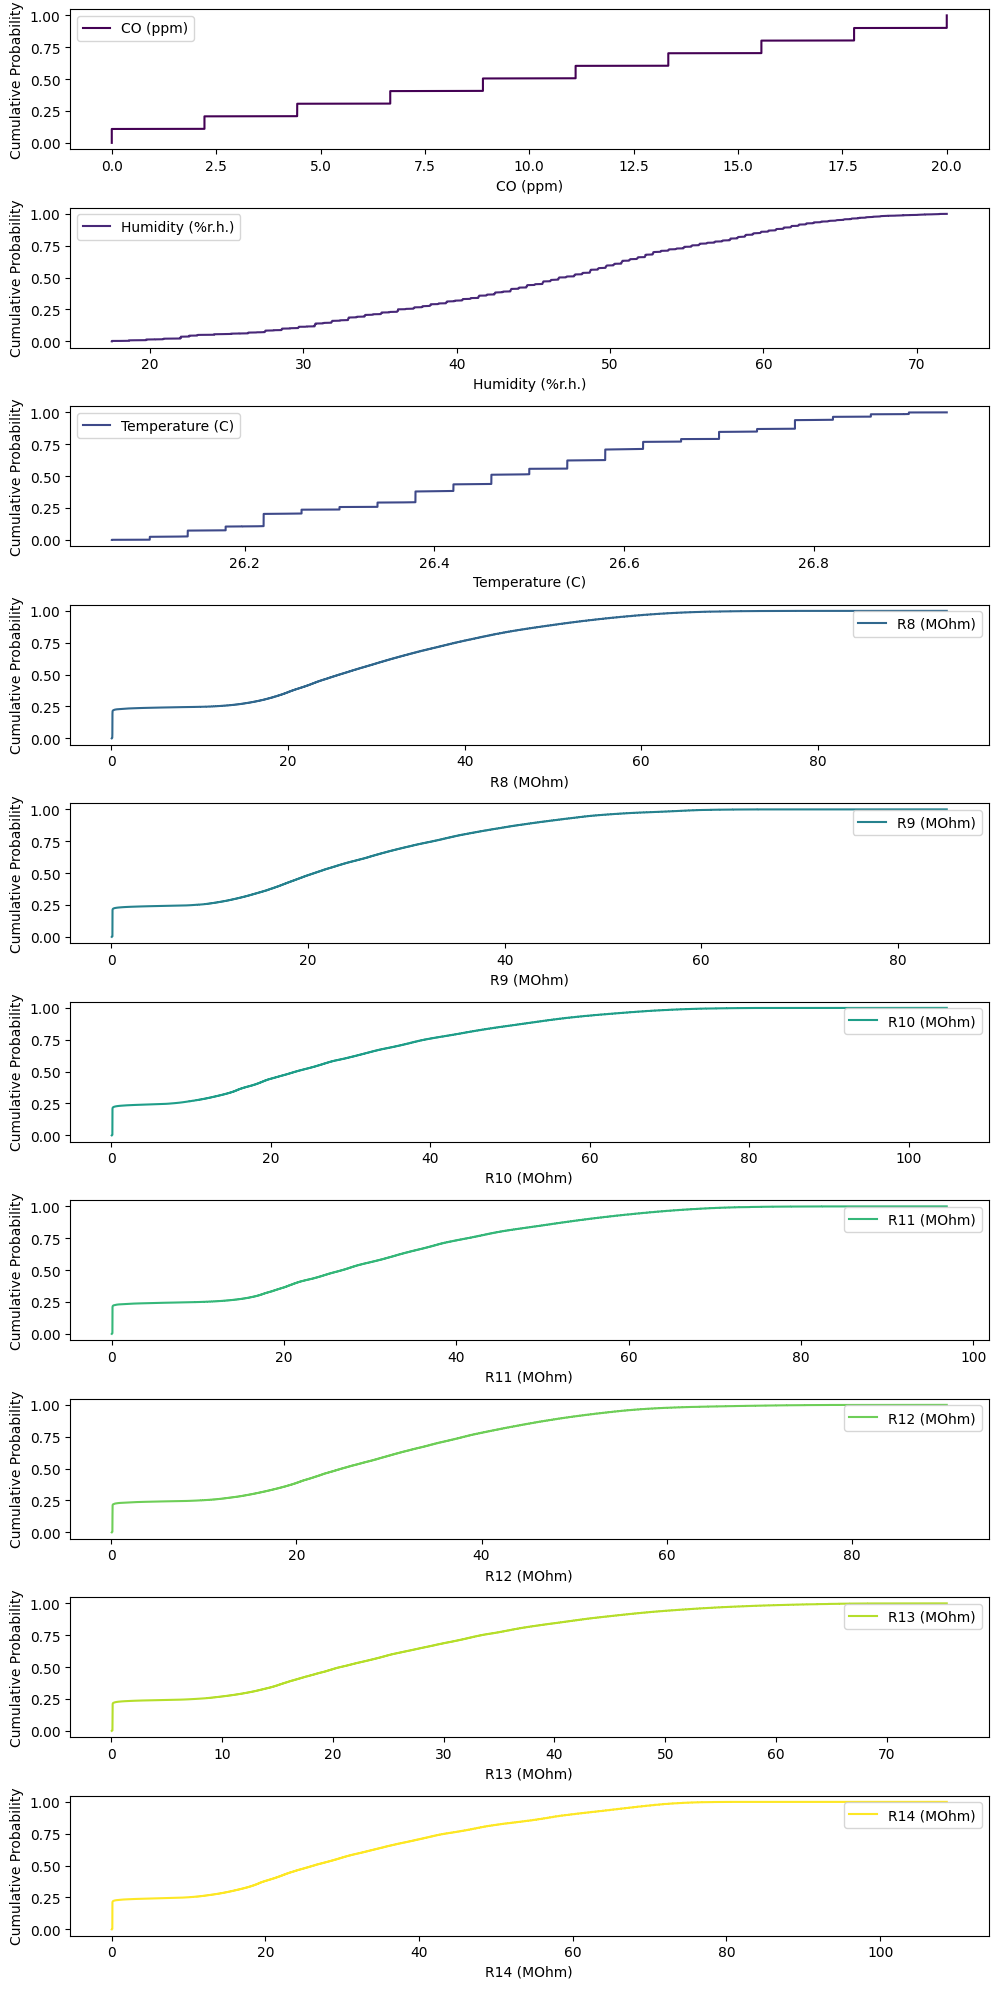

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming 'df_cleaned' is your DataFrame
# If not, replace 'df_cleaned' with your actual DataFrame variable name

# Specify the columns for which you want to draw CDF plots
columns_to_check = ['CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
                    'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
                    'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']

# Set up subplots for multiple CDF plots
fig, axs = plt.subplots(len(columns_to_check), 1, figsize=(10, 2 * len(columns_to_check)))

# Define a color map for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(columns_to_check)))

# Loop through each column and plot the CDF with a different color
for i, (column, color) in enumerate(zip(columns_to_check, colors)):
    # Extract the column data
    column_data = df_cleaned[column]

    # Sort the data in ascending order
    sorted_data = np.sort(column_data)

    # Calculate the CDF
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Plot the CDF for the current column with a different color
    axs[i].plot(sorted_data, cdf, label=column, color=color)

    # Add labels and title
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Cumulative Probability')
    axs[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# Clustering Target

## Elbow

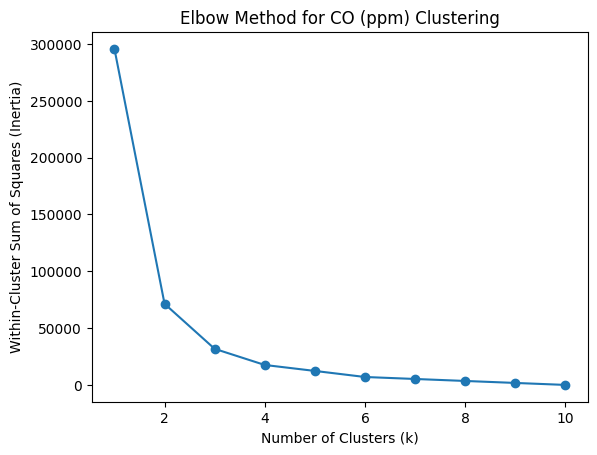

In [13]:
# Extract the 'CO (ppm)' column data
co_data = df_cleaned[['CO (ppm)']]

# Standardize the data (important for KMeans)
scaler = StandardScaler()
co_data_scaled = scaler.fit_transform(co_data)

# Use the elbow method to find the optimal number of clusters
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=5)
    kmeans.fit(co_data_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for CO (ppm) Clustering')
plt.show()


# Clustered Target

In [14]:
# Extract the 'CO (ppm)' column data
co_data = df_cleaned[['CO (ppm)']]

# Standardize the data (important for KMeans)
scaler = StandardScaler()
co_data_scaled = scaler.fit_transform(co_data)

# Use KMeans with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=5)
df_cleaned['Clustered_Target'] = kmeans.fit_predict(co_data_scaled)

# Display the DataFrame with the new 'Clustered_Target' column
df_cleaned.head(100)

,Time (s),CO (ppm),Humidity (%r.h.),Temperature (C),R8 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm),Clustered_Target
0,0.000,0.0,49.7534,26.476381,1.3303,1.4480,1.9148,3.4651,5.2144,6.5806,8.6385,3
1,0.309,0.0,55.8400,26.620000,21.9829,16.1902,24.2780,31.1014,34.7193,31.7505,41.9167,3
2,0.618,0.0,55.8400,26.620000,49.7495,31.7533,57.7289,53.6275,56.9212,47.8255,62.9436,3
3,0.926,0.0,55.8400,26.620000,59.2824,36.7821,66.0832,66.8349,66.9695,50.3730,64.8363,3
4,1.234,0.0,55.8400,26.620000,62.5385,39.6271,68.1441,62.0947,49.4614,52.8453,66.8445,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,29.346,0.0,55.3400,26.620000,51.3110,39.6271,58.5052,59.9272,47.5890,44.6138,61.5540,3
96,29.655,0.0,55.3400,26.620000,55.6363,39.6271,55.9066,55.6851,48.1165,45.7841,63.3641,3
97,29.965,0.0,55.3400,26.620000,51.6712,39.2482,60.5772,58.6825,46.2959,43.9065,61.1567,3
98,30.274,0.0,55.3400,26.620000,54.0730,39.2482,54.1325,54.6684,46.0722,43.7026,63.3641,3


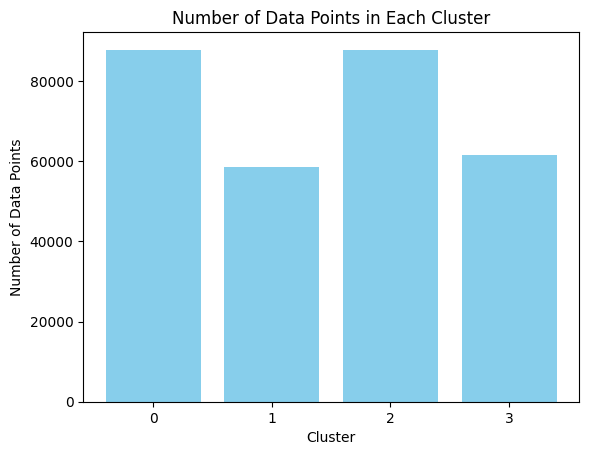

In [15]:
cluster_counts = df_cleaned['Clustered_Target'].value_counts()

# Plot a bar chart
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(cluster_counts.index)
plt.show()

# Add New Features

## Aggregations

In [16]:
columns = ['CO (ppm)','Humidity (%r.h.)', 'Temperature (C)', 'R8 (MOhm)','R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']
for col in columns:
    # Mean
    df_cleaned[f'{col} Mean'] = df_cleaned[col].rolling(window=100, min_periods=1).mean()
    # Median
    df_cleaned[f'{col}_Median'] = df_cleaned[col].rolling(window=100, min_periods=1).median()

    # Standard Deviation
    df_cleaned[f'{col}_Std'] = df_cleaned[col].rolling(window=100, min_periods=1).std()

## Rate of change

In [17]:
columns = ['Humidity (%r.h.)', 'Temperature (C)', 'R8 (MOhm)','R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)']
df_cleaned['CO_Rate_of_Change'] = df_cleaned['CO (ppm)'].diff() / df_cleaned['Time (s)'].diff()
for col in columns:
    df_cleaned[f'{col}_Rate_of_Change'] = df_cleaned[col].diff() / df_cleaned['Time (s)'].diff()

## Find correlations

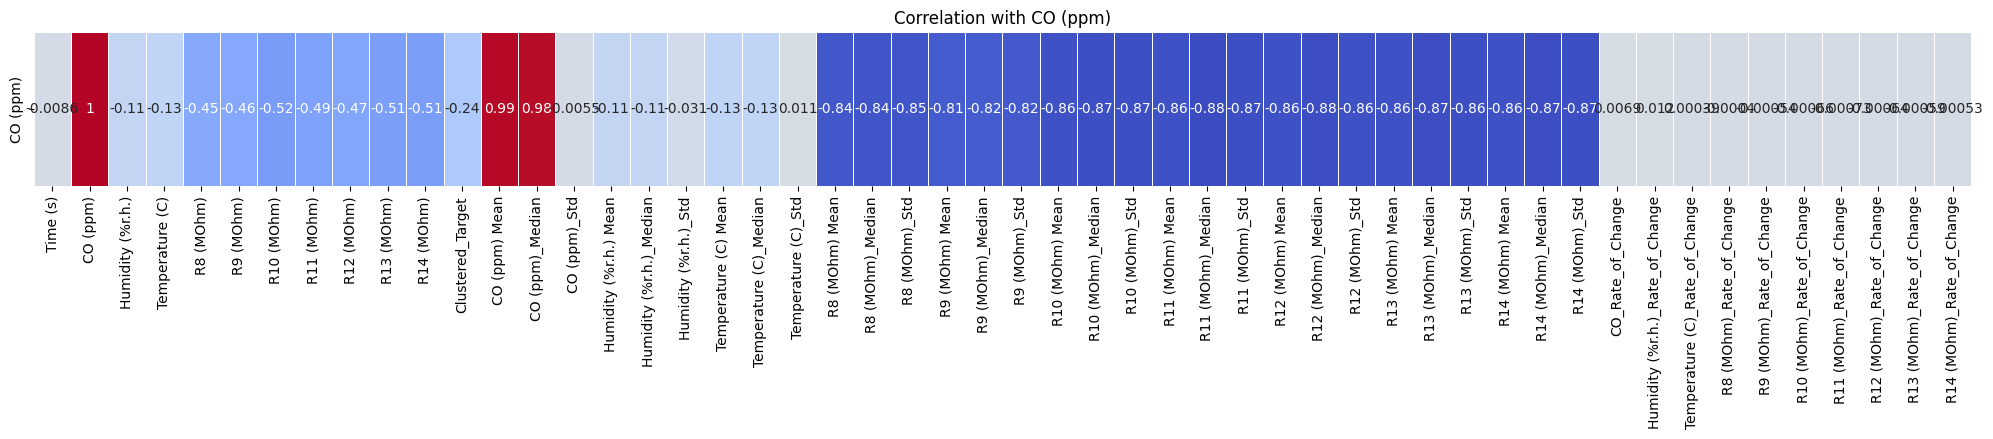

In [18]:
specific_column = 'CO (ppm)'

# Calculate correlation matrix for the specific column
column_correlation = df_cleaned.corrwith(df_cleaned[specific_column])

# Create a heatmap using Seaborn for visualization
plt.figure(figsize=(25, 2))
sns.heatmap(pd.DataFrame(column_correlation, columns=[specific_column]).T,
            annot=True, cmap='coolwarm', linewidths=.5, cbar=False)
plt.title(f'Correlation with {specific_column}')
plt.show()

# Remove columns with low correlation

In [19]:
absolute_correlation_threshold = 0.1  # Adjust as needed

# Calculate correlation with the specific column
column_correlation = df_cleaned.corr().abs()[specific_column]

# Find columns with correlation below the absolute threshold
low_correlation_cols = column_correlation[column_correlation < absolute_correlation_threshold].index

if 'Time (s)' in low_correlation_cols:
    low_correlation_cols = low_correlation_cols.drop('Time (s)')

# Drop columns with low correlation
df_filtered = df_cleaned.drop(low_correlation_cols, axis=1).fillna(method='bfill')

# Display the filtered DataFrame
print(df_filtered.columns)

Index(['Time (s)', 'CO (ppm)', 'Humidity (%r.h.)', 'Temperature (C)',
       'R8 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)', 'R11 (MOhm)', 'R12 (MOhm)',
       'R13 (MOhm)', 'R14 (MOhm)', 'Clustered_Target', 'CO (ppm) Mean',
       'CO (ppm)_Median', 'Humidity (%r.h.) Mean', 'Humidity (%r.h.)_Median',
       'Temperature (C) Mean', 'Temperature (C)_Median', 'R8 (MOhm) Mean',
       'R8 (MOhm)_Median', 'R8 (MOhm)_Std', 'R9 (MOhm) Mean',
       'R9 (MOhm)_Median', 'R9 (MOhm)_Std', 'R10 (MOhm) Mean',
       'R10 (MOhm)_Median', 'R10 (MOhm)_Std', 'R11 (MOhm) Mean',
       'R11 (MOhm)_Median', 'R11 (MOhm)_Std', 'R12 (MOhm) Mean',
       'R12 (MOhm)_Median', 'R12 (MOhm)_Std', 'R13 (MOhm) Mean',
       'R13 (MOhm)_Median', 'R13 (MOhm)_Std', 'R14 (MOhm) Mean',
       'R14 (MOhm)_Median', 'R14 (MOhm)_Std'],
      dtype='object')


# Plot correlation

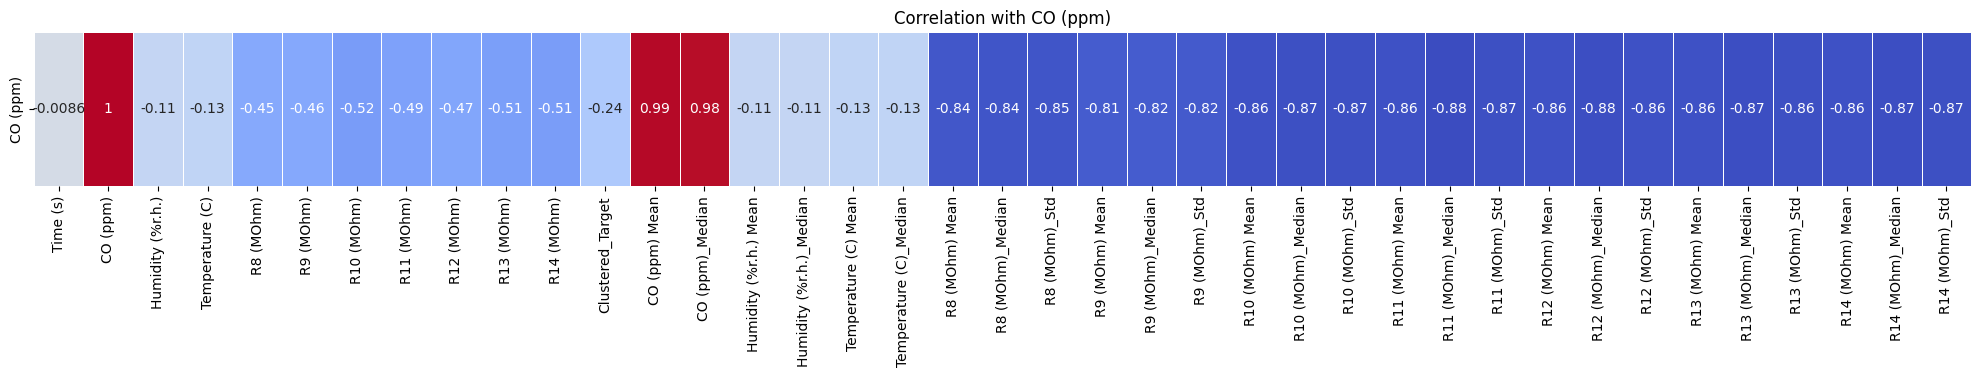

In [20]:
specific_column = 'CO (ppm)'

# Calculate correlation matrix for the specific column
column_correlation = df_filtered.corrwith(df_filtered[specific_column])

# Create a heatmap using Seaborn for visualization
plt.figure(figsize=(25, 2))
sns.heatmap(pd.DataFrame(column_correlation, columns=[specific_column]).T,
            annot=True, cmap='coolwarm', linewidths=.5, cbar=False)
plt.title(f'Correlation with {specific_column}')
plt.show()

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Selecting relevant features for the LSTM model
features = df_filtered.drop(columns=['CO (ppm)', 'Clustered_Target'])
target = df_filtered['CO (ppm)']

# Normalizing the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Defining a function to create sequences for LSTM input
def create_sequences(input_data, target_data, sequence_length):
    sequences = []
    target = []
    for i in range(len(input_data) - sequence_length):
        sequences.append(input_data[i:i + sequence_length])
        target.append(target_data[i + sequence_length])
    return np.array(sequences), np.array(target)

# Sequence length for LSTM model (this can be tuned)
sequence_length = 30

# Creating sequences
X, y = create_sequences(scaled_features, target, sequence_length)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the prepared data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((236551, 30, 37), (59138, 30, 37), (236551,), (59138,))

## Normal LSTM

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Defining the LSTM model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for predicting CO concentration
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

Epoch 1/100
6653/6653 [==============================] - 93s 14ms/step - loss: 3.3167 - val_loss: 0.7157
Epoch 2/100
6653/6653 [==============================] - 92s 14ms/step - loss: 1.1401 - val_loss: 0.5271
Epoch 3/100
6653/6653 [==============================] - 86s 13ms/step - loss: 0.7932 - val_loss: 0.8557
Epoch 4/100
6653/6653 [==============================] - 88s 13ms/step - loss: 0.5885 - val_loss: 0.2513
Epoch 5/100
6653/6653 [==============================] - 90s 14ms/step - loss: 0.4726 - val_loss: 0.2087
Epoch 6/100
6653/6653 [==============================] - 87s 13ms/step - loss: 0.3803 - val_loss: 0.1901
Epoch 7/100
6653/6653 [==============================] - 94s 14ms/step - loss: 0.3331 - val_loss: 0.2157
Epoch 8/100
6653/6653 [==============================] - 95s 14ms/step - loss: 0.3356 - val_loss: 0.2316
Epoch 9/100
6653/6653 [==============================] - 93s 14ms/step - loss: 0.2805 - val_loss: 0.1758
Epoch 10/100
6653/6653 [==============================]

## BiDirectional LSTM

In [23]:
from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
5914/5914 [==============================] - 82s 13ms/step - loss: 3.0138 - val_loss: 0.8842
Epoch 2/100
5914/5914 [==============================] - 80s 14ms/step - loss: 1.0465 - val_loss: 0.4274
Epoch 3/100
5914/5914 [==============================] - 81s 14ms/step - loss: 0.6566 - val_loss: 0.3430
Epoch 4/100
5914/5914 [==============================] - 81s 14ms/step - loss: 0.5733 - val_loss: 0.3508
Epoch 5/100
5914/5914 [==============================] - 82s 14ms/step - loss: 0.4869 - val_loss: 0.3069
Epoch 6/100
5914/5914 [==============================] - 81s 14ms/step - loss: 0.4260 - val_loss: 0.3454
Epoch 7/100
5914/5914 [==============================] - 79s 13ms/step - loss: 0.3179 - val_loss: 0.2050
Epoch 8/100
5914/5914 [==============================] - 79s 13ms/step - loss: 0.3412 - val_loss: 0.2035
Epoch 9/100
5914/5914 [==============================] - 76s 13ms/step - loss: 0.2843 - val_loss: 0.2103
Epoch 10/100
5914/5914 [==============================]

## CNN+LSTM

In [38]:
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Increased dropout rate
    LSTM(30, return_sequences=True),  # Reduced number of units
    Dropout(0.3),  # Increased dropout rate
    LSTM(30),  # Reduced number of units
    Dropout(0.3),  # Increased dropout rate
    Dense(30, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
    Dense(1)
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

Epoch 1/100
 544/5914 [=>............................] - ETA: 28s - loss: 20.1737

KeyboardInterrupt: 

## GRU

In [32]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.callbacks import EarlyStopping

# Defining the GRU model
model = Sequential([b
    GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    GRU(50),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
5914/5914 [==============================] - 70s 12ms/step - loss: 2.4431 - val_loss: 1.3267
Epoch 2/100
5914/5914 [==============================] - 67s 11ms/step - loss: 0.6203 - val_loss: 0.2961
Epoch 3/100
5914/5914 [==============================] - 68s 11ms/step - loss: 0.4259 - val_loss: 0.2448
Epoch 4/100
5914/5914 [==============================] - 72s 12ms/step - loss: 0.3728 - val_loss: 0.1718
Epoch 5/100
5914/5914 [==============================] - 68s 12ms/step - loss: 0.3805 - val_loss: 0.2504
Epoch 6/100
5914/5914 [==============================] - 70s 12ms/step - loss: 0.2877 - val_loss: 0.2656
Epoch 7/100
5914/5914 [==============================] - 551s 93ms/step - loss: 0.2830 - val_loss: 0.2005
Epoch 8/100
5914/5914 [==============================] - 75s 13ms/step - loss: 0.2367 - val_loss: 0.3490
Epoch 9/100
5914/5914 [==============================] - 71s 12ms/step - loss: 0.2066 - val_loss: 0.5171
Epoch 10/100
5914/5914 [==============================

## ARIMA and SARIMA

### 1. Check stationary

### 2. ARIMA

In [36]:
from statsmodels.tsa.arima.model import ARIMA

# Load a subset of the data for demonstration
file_path = 'dataset/20160930_203718.csv'
filtered_data = pd.read_csv(file_path).head(1000)  # Using only the first 1000 rows

# Use 'CO (ppm)' as the target series
ts = filtered_data['CO (ppm)']

# Fit ARIMA model (using p=1, d=1, q=1 for demonstration)
model = ARIMA(ts, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast future values - let's forecast the next 5 values for demonstration
forecast = fitted_model.forecast(steps=5)
forecast

/Users/mohammad/Documents/projects/phd/elec-825/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1000    0.0
1001    0.0
1002    0.0
1003    0.0
1004    0.0
Name: predicted_mean, dtype: float64

### 3. SARIMA

In [37]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

filtered_data = pd.read_csv(file_path).head(1000)  # Using only the first 1000 rows for demo

# Target variable
ts = filtered_data['CO (ppm)']

# Define SARIMA parameters - these are hypothetical and should be tuned for your dataset
p, d, q = 1, 1, 1  # Non-seasonal parameters
P, D, Q, S = 1, 1, 1, 12  # Seasonal parameters (assuming a seasonal period of 12)

# Fit SARIMA model
model = SARIMAX(ts, order=(p, d, q), seasonal_order=(P, D, Q, S))
fitted_model = model.fit()

# Forecast future values - forecasting the next 5 periods for demonstration
forecast = fitted_model.forecast(steps=5)
forecast


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04025D+01    |proj g|=  6.91556D+04


 This problem is unconstrained.


  ys=-1.703E+00  -gs= 9.113E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     37      2     1     0   2.459D+05  -1.259D+01
  F =  -12.586679933251929     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/Users/mohammad/Documents/projects/phd/elec-825/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


1000    0.0
1001    0.0
1002    0.0
1003    0.0
1004    0.0
Name: predicted_mean, dtype: float64